In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
relu_train = np.load('./results/relu_train.npy')
relu_val = np.load('./results/relu_val.npy')
sig_train = np.load('./results/sig_train.npy')
sig_val = np.load('./results/sig_val.npy')

Text(0, 0.5, 'Validation accuracy')

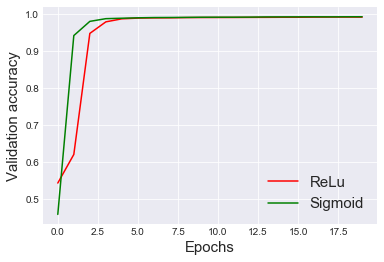

In [4]:
plt.style.use('seaborn-darkgrid')

plt.plot(relu_val,label = 'ReLu',color = 'r')
plt.plot(sig_val,label = 'Sigmoid',color = 'g')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Validation accuracy',size=15)
# plt.savefig('./experiments/results/reluu.jpg', bbox_inches='tight', dpi=500)
# plt.yscale('log')

In [5]:
layer_train = np.load('./results/layer_train.npy')
layer_val = np.load('./results/layer_val.npy')

Text(0, 0.5, 'Validation accuracy')

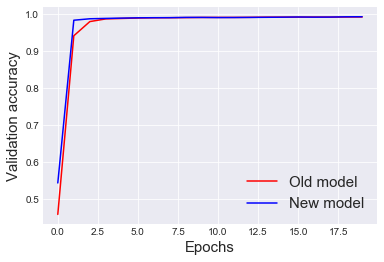

In [6]:
plt.plot(sig_val,label = 'Old model',color = 'r')
plt.plot(layer_val,label = 'New model',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Validation accuracy',size=15)
# plt.savefig('./experiments/results/newlayer.jpg', bbox_inches='tight', dpi=500)

In [7]:
wei_train = np.load('./results/wei_train.npy')
wei_val = np.load('./results/wei_val.npy')

Text(0, 0.5, 'Validation accuracy')

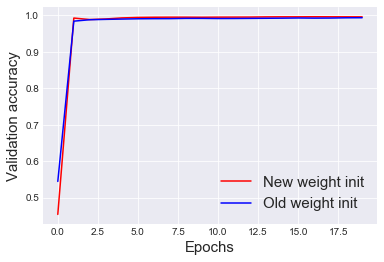

In [8]:
plt.plot(wei_val,label = 'New weight init',color = 'r')
plt.plot(layer_val,label = 'Old weight init',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Validation accuracy',size=15)
# plt.savefig('./experiments/results/weilayer.jpg', bbox_inches='tight', dpi=500)

# Part3

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset
import pickle
import os
import copy
from sklearn.manifold import TSNE

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


# show image

In [50]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.yticks([18 + i*34 for i in range(len(classes))], classes, fontsize=15)
    plt.xticks([])
    plt.tick_params(length=0)
#     plt.savefig('./experiments/results/imm.jpg', bbox_inches='tight', dpi=500)
    plt.show()

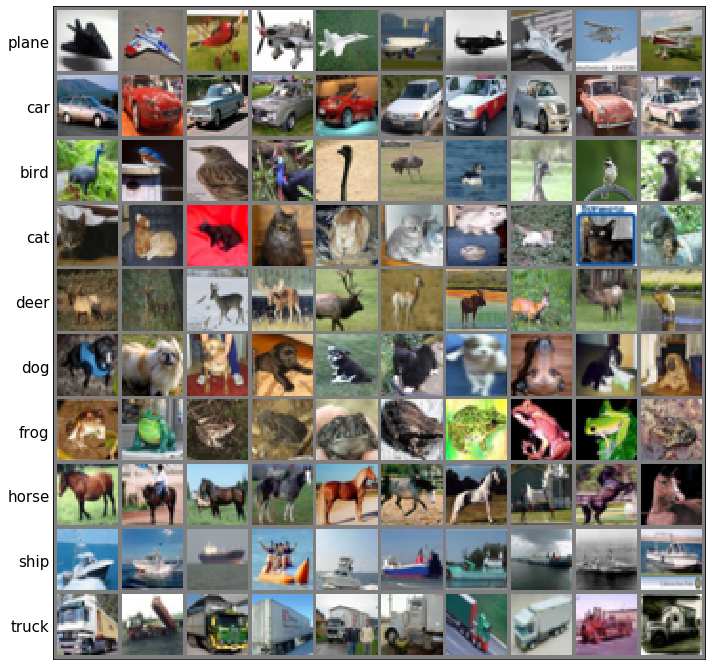

In [51]:
# get 10 training images of each class
images = []
for class_ in range(len(classes)):
    for image, label in trainset:
        if label == class_:
            images.append(image)
        if len(images) == (class_ + 1)*10:
            break

# show images
imshow(torchvision.utils.make_grid(images, nrow=10, padding=2))

In [9]:
norm_testacc_epoch = np.load('./results/norm_testacc_epoch.npy')
norm_trainacc_epoch = np.load('./results/norm_trainacc_epoch.npy')
testacc_epoch = np.load('./results/testacc_epoch.npy')
trainacc_epoch = np.load('./results/trainacc_epoch.npy')

Text(0, 0.5, 'Accuracy')

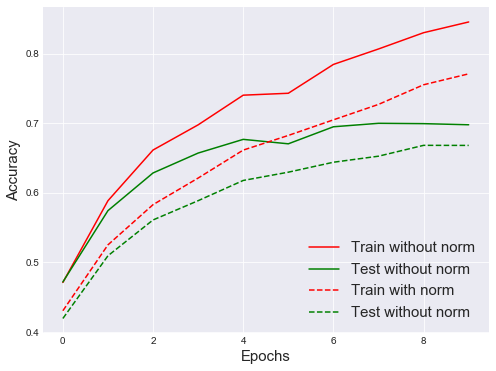

In [10]:
plt.figure(figsize=(8,6))
plt.plot(norm_trainacc_epoch,label = 'Train without norm',color = 'r')
plt.plot(norm_testacc_epoch,label = 'Test without norm',color = 'g')
plt.plot(trainacc_epoch,'--',label = 'Train with norm',color = 'r')
plt.plot(testacc_epoch,'--',label = 'Test without norm',color = 'g')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)
# plt.savefig('./experiments/results/batchh.jpg', bbox_inches='tight', dpi=500)

In [12]:
sgd_testacc_epoch = np.load('./results/sgd_testacc_epoch.npy')
sgd_trainacc_epoch = np.load('./results/sgd_trainacc_epoch.npy')

Text(0, 0.5, 'Accuracy')

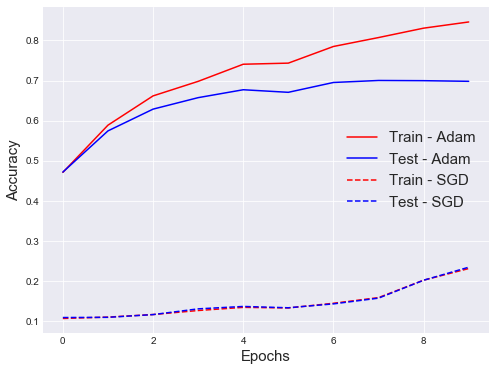

In [13]:
plt.figure(figsize=(8,6))
plt.plot(norm_trainacc_epoch,label = 'Train - Adam',color = 'r')
plt.plot(norm_testacc_epoch,label = 'Test - Adam',color = 'b')
plt.plot(sgd_trainacc_epoch,'--',label = 'Train - SGD',color = 'r')
plt.plot(sgd_testacc_epoch,'--',label = 'Test - SGD',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Accuracy',size=15)
# plt.savefig('./experiments/results/oppppp.jpg', bbox_inches='tight', dpi=500)

In [14]:
totallr = np.load('./results/totallr.npy')

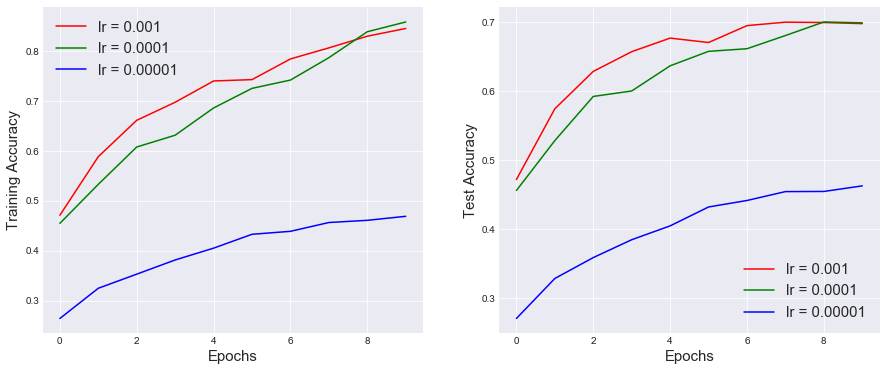

In [15]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(norm_trainacc_epoch,label = 'lr = 0.001',color = 'r')
plt.plot(totallr[0],label = 'lr = 0.0001',color = 'g')
plt.plot(totallr[2],label = 'lr = 0.00001',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Training Accuracy',size=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(norm_testacc_epoch,label = 'lr = 0.001',color = 'r')
plt.plot(totallr[1],label = 'lr = 0.0001',color = 'g')
plt.plot(totallr[3],label = 'lr = 0.00001',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Test Accuracy',size=15)
plt.legend(fontsize=15)
# plt.savefig('./experiments/results/lr.jpg', bbox_inches='tight', dpi=500)

In [16]:
totalbatch = np.load('./results/totalbatch.npy')

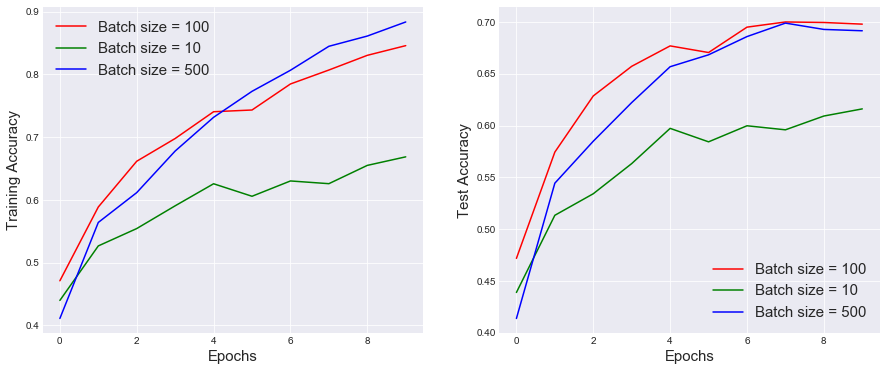

In [17]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(norm_trainacc_epoch,label = 'Batch size = 100',color = 'r')
plt.plot(totalbatch[0],label = 'Batch size = 10',color = 'g')
plt.plot(totalbatch[2],label = 'Batch size = 500',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Training Accuracy',size=15)
plt.legend(fontsize=15)
plt.subplot(1,2,2)
plt.plot(norm_testacc_epoch,label = 'Batch size = 100',color = 'r')
plt.plot(totalbatch[1],label = 'Batch size = 10',color = 'g')
plt.plot(totalbatch[3],label = 'Batch size = 500',color = 'b')
plt.legend(fontsize=15)
plt.xlabel('Epochs',size=15)
plt.ylabel('Test Accuracy',size=15)
plt.legend(fontsize=15)
# plt.savefig('./experiments/results/batch.jpg', bbox_inches='tight', dpi=500)